# **Exploratory Data Analysis**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
diabetes_df=pd.read_csv('diabetes.csv')

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diabetes_df.value_counts('Outcome')

,count
Outcome,
0,500
1,268


0--> Non-Diabetic
1--> Diabetic

<ipython-input-11-3537377077>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=diabetes_df,palette='hls', legend=True)


<Axes: xlabel='Outcome', ylabel='count'>

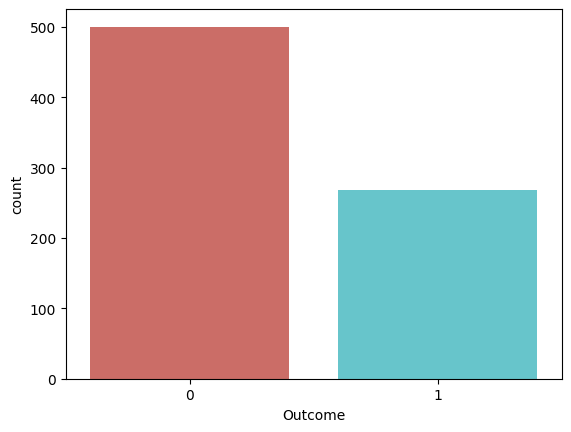

In [ ]:
import seaborn as sns
sns.countplot(x='Outcome',data=diabetes_df,palette='hls', legend=True)

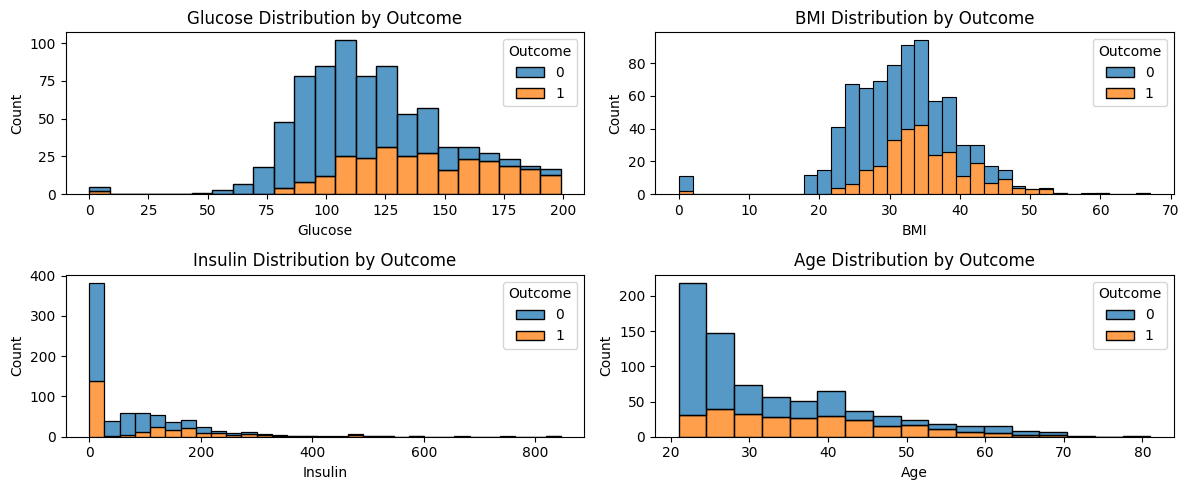

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# Plot the first histogram on the first subplot (axes[0])
sns.histplot(data=diabetes_df, x='Glucose', hue='Outcome', multiple='stack', ax=axes[0][0])
axes[0][0].set_title('Glucose Distribution by Outcome')

# Plot the second histogram on the second subplot (axes[1])
sns.histplot(data=diabetes_df, x='BMI', hue='Outcome', multiple='stack', ax=axes[0][1])
axes[0][1].set_title('BMI Distribution by Outcome')

sns.histplot(data=diabetes_df, x='Insulin', hue='Outcome', multiple='stack', ax=axes[1][0])
axes[1][0].set_title('Insulin Distribution by Outcome')

sns.histplot(data=diabetes_df, x='Age', hue='Outcome', multiple='stack', ax=axes[1][1])
axes[1][1].set_title('Age Distribution by Outcome')
# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()


Possibility of having diabetes increases as BMI increases.\
Over the age of 40, Diabetes risk increases.\
With  increase in glucose level, count of diabetic people also increase.\
Meanwhile, insulin shows less variation as it increases.



<Axes: >

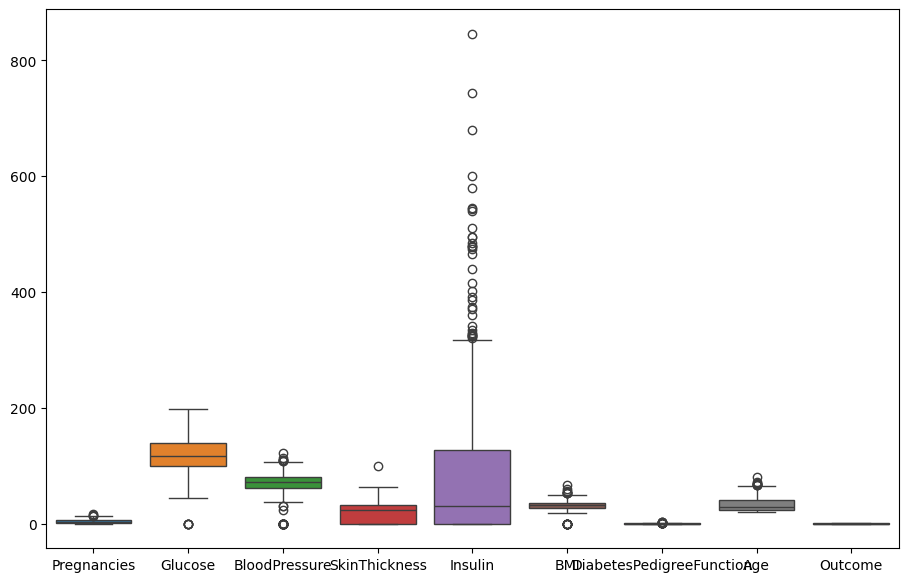

In [ ]:
plt.figure(figsize=(11,7))
sns.boxplot(data=diabetes_df)

In [ ]:
# Filter the DataFrame to see rows with high Insulin values (adjust the threshold based on the boxplot)
outliers_insulin = diabetes_df[diabetes_df['Insulin'] > 400]
display(outliers_insulin)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
111,8,155,62,26,495,34.0,0.543,46,1
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
248,9,124,70,33,402,35.4,0.282,34,0
286,5,155,84,44,545,38.7,0.619,34,0


These are not data errors, instead genuine, valuable data. We won't be removing these.

<Axes: >

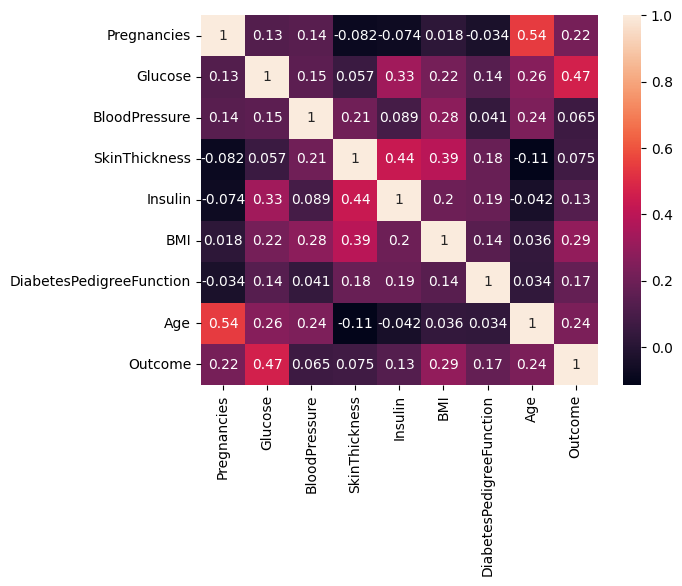

In [ ]:
sns.heatmap(diabetes_df.corr(),annot=True)

Attributes like No. of Pregnancies, Glucose level, BMI and age have a relatively stronger positive correlation with the outcome. Meanwhile attributes like Insulin level, BP, Diabetes Pedigree Function have a weaker correlation with the outcome.

# **Splitting the data**

In [28]:
X=diabetes_df.drop('Outcome',axis=1)
Y=diabetes_df['Outcome']

In [30]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(Y_train)

602    0
429    1
623    0
209    1
589    0
      ..
534    0
584    1
493    1
527    0
168    0
Name: Outcome, Length: 614, dtype: int64


# **Model Fitting**

In [36]:
model=LogisticRegression()

In [38]:
model.fit(X_train,Y_train)

LogisticRegression()

# **Accuracy Test Score**

In [39]:
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction,Y_train)

print('Accuracy on Train data:', train_data_accuracy)

Accuracy on Train data: 0.7801302931596091


In [40]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on Train data:', test_data_accuracy)

Accuracy on Train data: 0.7662337662337663


# **Prediction Check**

In [64]:
input_data=(0,125,68,0,0,24.7,0.206,21)
in_array=np.asarray(input_data)
in_array_reshaped=in_array.reshape(1,-1)
# Scale the input data using the same scaler fitted on the training data
scaled_input_data = scaler.transform(in_array_reshaped)
prediction=model.predict(scaled_input_data)
print(prediction)
if prediction[0]==0:
  print("The person is non-diabetic")
else:
  print("The person is diabetic")

[0]
The person is non-diabetic
